# Calculation general flare distributions in $\mu$

In [1]:
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt


In [2]:
# general distribution for area 
def rice_dist(x, sigma, nu):
    x = np.abs(x)
    return x / sigma**2 * np.exp( - (x**2 + nu **2 ) / (2 * sigma **2)) * sc.iv(0, (x * nu / sigma**2))

sigma_fit, nu_fit = (9.02769086 / 180 * np.pi, 10.48768514 / 180 * np.pi)

def rho(alpha):
    alpha = np.pi / 2 - alpha
    return rice_dist(alpha, sigma_fit, nu_fit) / 2 / np.pi / (np.cos(alpha)+0.001) / 2 
            # fit of dist when integrated over phi and absolute value so accounting for that

(0.16606213508719997, 1.4065074105396036e-10)

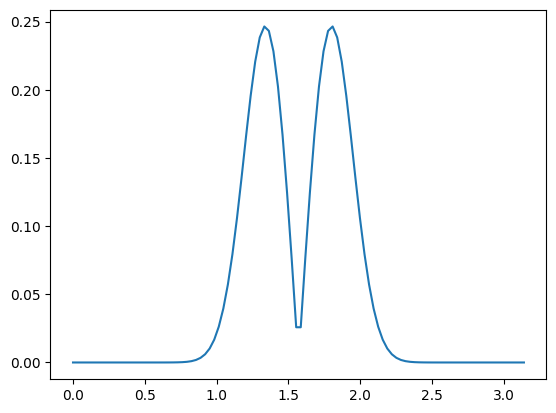

In [17]:
alpha = np.linspace(0, np.pi, 100)
plt.plot(alpha, rho(alpha))

Therefore density is $$\rho_\mu(\mu) = \frac{2}{\sin \theta} \int_{[0, 2\pi]}d\phi \rho (\alpha(\theta, \phi))
.$$
where
$$
\cos \alpha = \sin \tau \sin \theta \cos \phi +\cos \theta \cos \tau  $$
and $\mu = \cos \theta$

In [4]:
# general distribution for given tau
from scipy.integrate import quad


def get_alpha(tau, theta, phi):
    return np.arccos( np.sin( tau ) * np.sin(theta) * np.cos(phi) + np.cos(tau) * np.cos(theta))

def rho_mu(mu, tau):
    theta = np.arccos(mu)
    I = lambda phi: rho(get_alpha(tau, theta, phi))
    return 2 / np.sin(theta) * quad(I, 0, 2*np.pi)[0]

def rho_mus(mus, tau):
    return [ rho_mu(mu,tau) for mu in mus]
    


In [16]:
get_alpha(np.pi/2, np.pi/2, np.pi)

3.141592653589793

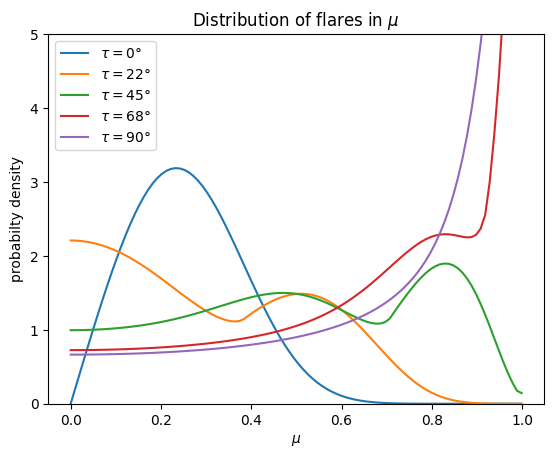

In [19]:
# rho_mu_of_tau = lambda tau : lambda mu : rho_mu(mu, tau)


mu = np.linspace(0,0.999, 100)

for tau in np.linspace(0,np.pi/2, 5):
    plt.plot(mu, rho_mus(mu, tau), label=fr'$\tau=${round(tau*180/np.pi)}°')
    
plt.ylim(0,5)
plt.title(r"Distribution of flares in $\mu$")
plt.xlabel(r"$\mu$")
plt.ylabel("probabilty density")
plt.legend()